In [5]:
# Dependencies 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from math import ceil, floor
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [6]:
# parameters to play around :)
size = 1000 # set the size for the shortest edge in pixels
bg = [224, 214, 206] # background color in [b, g, r]

In [7]:
def portrait():
    print('Processing ' + fname + ' in portrait mode.')
    dsize = (floor(size * img.shape[1] / img.shape[0]), size)
    src = cv.resize(img, dsize)    
    height = src.shape[0]
    width = src.shape[1]
    border = cv.copyMakeBorder(src, 0, 0, 0, 
                               ceil(0.5 * width), cv.BORDER_CONSTANT, value = bg)
    step_ver = floor(height / 7)
    left_width = ceil(0.4 * width)
    left_spacing = ceil(0.05 * width)
    blank_ratio = 0.4
    fill_arr = []
    for step in range(7):
        fill_arr.append([floor(step * step_ver + blank_ratio * step_ver), (step + 1) * step_ver])
    for vstart, vfinish in fill_arr:
        for y in range(vstart, vfinish):
            for x in range(floor(1.05 * width), floor(1.45 * width)):
                border[y,x] = src[vstart: vfinish, :][0].mean(axis = 0)
    plt.imshow(border)
    plt.show()
    cv.imwrite("product/" + ffname + "_product.jpeg", border)
    print('Color palette for ' + fname + ' complete!')
    
def landscape():
    print('Processing ' + fname + ' in landscape mode.')
    dsize = (size, floor(size * img.shape[0] / img.shape[1]))
    src = cv.resize(img, dsize)    
    height = src.shape[0]
    width = src.shape[1]
    border = cv.copyMakeBorder(src, 0, ceil(0.5 * height),
                                  0, 0, cv.BORDER_CONSTANT, value = bg)
    step_hor = floor(width / 7)
    down_height = ceil(0.4 * height)
    down_spacing = ceil(0.05 * height)
    blank_ratio = 0.2
    step_ver = floor(height / 7)

    fill_arr = []
    for step in range(7):
        fill_arr.append([floor(step * step_hor + blank_ratio * step_hor), (step + 1) * step_hor, 
                         floor(step * step_ver), (step + 1) * step_ver])
    for hstart, hfinish, vstart, vfinish in fill_arr:
        for x in range(hstart, hfinish):
            for y in range(floor(1.05 * height), floor(1.45 * height)):
                border[y,x] = src[vstart: vfinish, :][0].mean(axis = 0)
    plt.imshow(border)
    plt.show()
    cv.imwrite("product/" + ffname + "_product.jpeg", border)
    print('Color palette for ' + fname + ' complete!')

Reading files in the folder ...
Processing Test2.jpg in landscape mode.


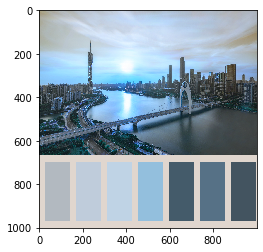

Color palette for Test2.jpg complete!
Processing Test 1.jpg in portrait mode.


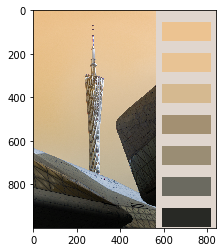

Color palette for Test 1.jpg complete!


In [8]:
# main
files = [f for f in listdir('src/') if isfile(join('src/', f))]
try: 
    files.remove('.DS_Store')
    print("Reading files in the folder ...")
except: 
    print("Reading files in the source folder ...")

for fname in files:
    ffname = fname.split('.')[0]
    img = cv.imread(cv.samples.findFile("src/" + fname))
    if img is None:
        sys.exit("Could not read the image.")
    if img.shape[1] < img.shape[0]: # portrait
        portrait()
    else: # landscape
        landscape()